In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [168]:
df = pd.read_csv("haberman.csv")

In [169]:
df.shape

(305, 4)

In [170]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [171]:
df.columns = ['Age', 'OperationYear', 'AxiliaryNodes', 'Status']

In [172]:
df.head()

,Age,OperationYear,AxiliaryNodes,Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [173]:
df['Status'] = df['Status'].map({1:"yes", 2:"no"})

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age              305 non-null int64
OperationYear    305 non-null int64
AxiliaryNodes    305 non-null int64
Status           305 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [175]:
df.describe()

,Age,OperationYear,AxiliaryNodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [176]:
df.dtypes

Age               int64
OperationYear     int64
AxiliaryNodes     int64
Status           object
dtype: object

In [177]:
df['Status'] = df['Status'].astype('category')

In [182]:
np.all(np.isfinite(df['Age']))

True

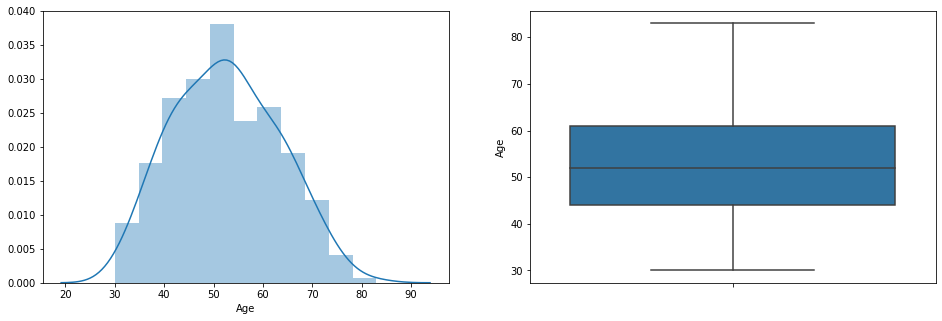

In [183]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(df['Age'])

plt.subplot(122)
sns.boxplot(y="Age", data = df)

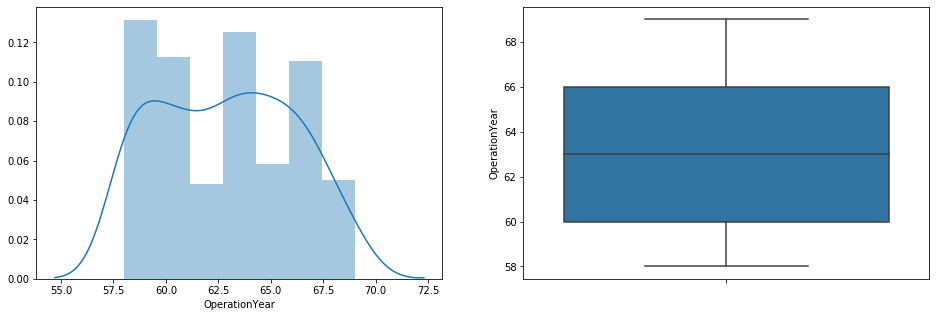

In [184]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(df['OperationYear'])

plt.subplot(122)
sns.boxplot(y="OperationYear", data = df)

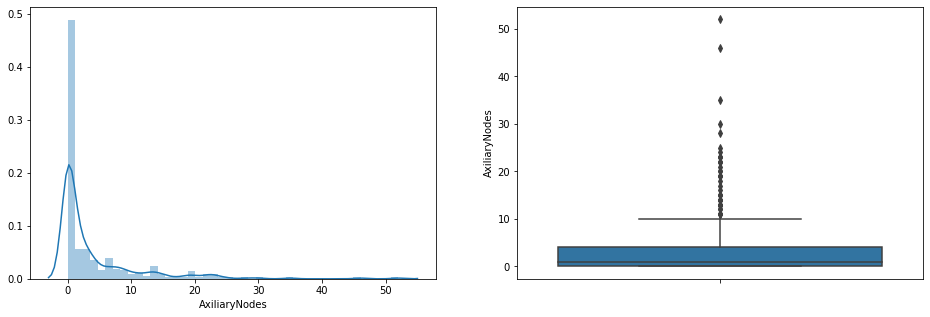

In [185]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(df['AxiliaryNodes'])

plt.subplot(122)
sns.boxplot(y="AxiliaryNodes", data = df)

In [186]:
df['AxiliaryNodes'].isnull().sum()

0

In [187]:
df['OperationYear'].isnull().sum()

0

In [188]:
df['Age'].isnull().sum()

0

In [189]:
for i in range(0,100,10):
    var = df["AxiliaryNodes"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 1
60 percentile value is 2
70 percentile value is 3
80 percentile value is 7
90 percentile value is 13
100 percentile value is  52


In [190]:
for i in range(90,100):
    var = df["AxiliaryNodes"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 13
91 percentile value is 14
92 percentile value is 15
93 percentile value is 16
94 percentile value is 19
95 percentile value is 20
96 percentile value is 22
97 percentile value is 23
98 percentile value is 24
99 percentile value is 30
100 percentile value is  52


In [191]:
len(df[df['AxiliaryNodes'] > 20])

14

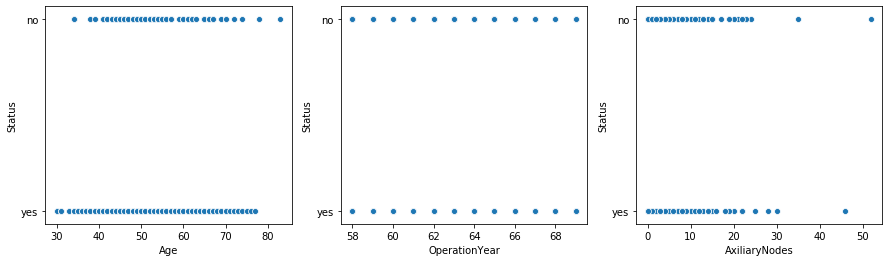

In [192]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.scatterplot(x = 'Age', y = 'Status', data = df, ax = axes[0])
sns.scatterplot(x = 'OperationYear', y = 'Status', data = df, ax = axes[1])
sns.scatterplot(x = 'AxiliaryNodes', y = 'Status', data = df, ax = axes[2])

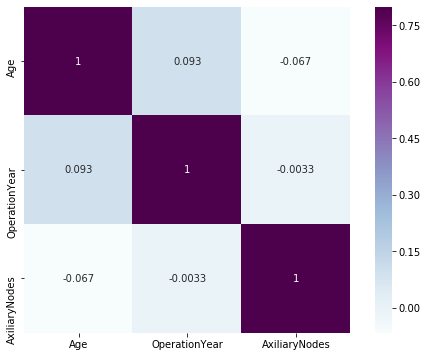

In [193]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, annot = True, square=True, cmap="BuPu");

In [194]:
df = df[df.AxiliaryNodes < 21]

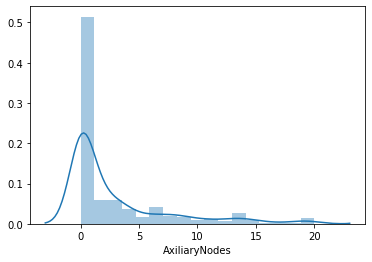

In [195]:
sns.distplot(df['AxiliaryNodes'])

In [196]:
df['AxiliaryNodes'] = np.log(df['AxiliaryNodes'] + 1)

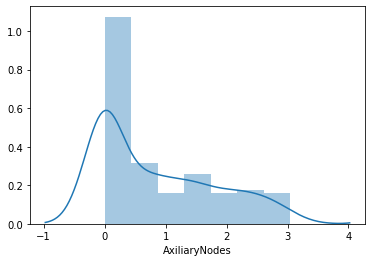

In [197]:
sns.distplot(df['AxiliaryNodes'])

In [198]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [199]:
X = df.drop(['Status'],axis = 1)
y = df['Status']

In [200]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 7)

In [201]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
pred_test = model.predict(X_valid)
score = accuracy_score(y_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.7808219178082192


In [202]:
model = GaussianNB()
model.fit(X_train, y_train)
pred_test = model.predict(X_valid)
score = accuracy_score(y_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.7671232876712328


In [203]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
pred_test = model.predict(X_valid)
score = accuracy_score(y_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.7671232876712328
